In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [0]:
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 8
NUM_EPOCH = 10

train_path = "/content/gdrive/My Drive/app/xray/chest_xray/train"
valid_path = "/content/gdrive/My Drive/app/xray/chest_xray/val"

In [15]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

folders = glob("/content/gdrive/My Drive/app/xray/chest_xray/train/*")

x = Flatten()(vgg.output)
prediction  = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [0]:
valid_set = test_datagen.flow_from_directory(valid_path, target_size=(224,224), batch_size=BATCH_SIZE, class_mode='categorical')

Found 16 images belonging to 2 classes.


Epoch 1/10
652/652 [==============================] - 2108s 3s/step - loss: 0.2131 - acc: 0.9319 - val_loss: 1.1596 - val_acc: 0.6875
Epoch 2/10
652/652 [==============================] - 156s 240ms/step - loss: 0.1778 - acc: 0.9484 - val_loss: 0.2959 - val_acc: 0.8125
Epoch 3/10
652/652 [==============================] - 155s 237ms/step - loss: 0.1553 - acc: 0.9569 - val_loss: 0.5412 - val_acc: 0.8750
Epoch 4/10
652/652 [==============================] - 155s 238ms/step - loss: 0.1894 - acc: 0.9530 - val_loss: 0.2589 - val_acc: 0.9375
Epoch 5/10
652/652 [==============================] - 155s 238ms/step - loss: 0.1539 - acc: 0.9643 - val_loss: 0.9879 - val_acc: 0.7500
Epoch 6/10
652/652 [==============================] - 156s 239ms/step - loss: 0.1462 - acc: 0.9647 - val_loss: 1.8297 - val_acc: 0.6875
Epoch 7/10
652/652 [==============================] - 158s 243ms/step - loss: 0.1210 - acc: 0.9678 - val_loss: 0.3017 - val_acc: 0.8750
Epoch 8/10
652/652 [==============================

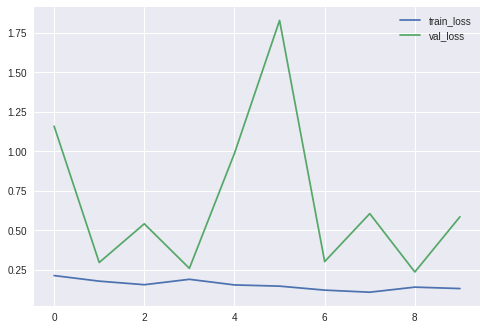

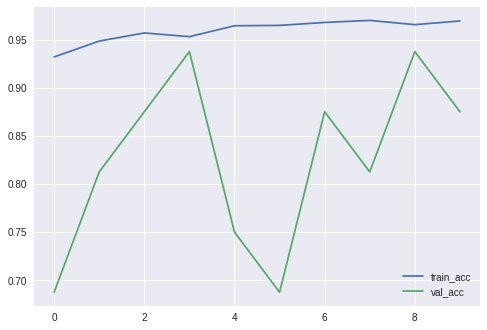

<Figure size 576x396 with 0 Axes>

In [0]:
r=model.fit_generator(training_set, validation_data=valid_set, epochs=NUM_EPOCH, steps_per_epoch=len(training_set), validation_steps=len(valid_set))

plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/Lossval_loss")

plt.plot(r.history['acc'], label='train_acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("/content/gdrive/My Drive/app/xray/Lossval_acc")

model.save("/content/gdrive/My Drive/app/xray/model_vgg16.h5")

In [17]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('/content/gdrive/My Drive/app/xray/model_vgg16.h5')
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg", target_size=(224, 224))
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg", target_size=(224, 224))

#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/PNEUMONIA/person1682_virus_2899.jpeg", target_size=(224, 224))
#img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/PNEUMONIA/person1629_virus_2823.jpeg", target_size=(224, 224))
model.summary()
img = image.load_img("/content/gdrive/My Drive/app/xray/chest_xray/test/NORMAL/NORMAL2-IM-0374-0001.jpeg", target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)


print(classes)
numpy_image = cv2.resize(img, (700,700))
plt.imshow(numpy_image)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3, 224, 224)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 56, 56)       0         
__________

ValueError: ignored

In [0]:
print(classes)

[[1. 0.]]


Chạy predict với một ảnh bất kỳ.
Kết quả [1. 0.] là nomal và [0. 1.] là bị viêm phổi
Mình đã chạy thử với một vài ảnh và model của chúng ta vừa train đã dự đoán đúng gần hết. Thật tuyệt phải không nào!

In [0]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [0]:
vgg = VGG19(input_shape=[3]+IMAGE_SIZE, weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

folders = glob("/content/gdrive/My Drive/app/xray/chest_xray/train/*")

x = Flatten()(vgg.output)
prediction  = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

80142336/80134624 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 3, 224, 224)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 224, 224)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 224, 224)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 112, 112)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 112, 112)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 112, 112)     147584    
_________________________________________________________________
block2_pool

In [0]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

filepath="/content/gdrive/My Drive/app/xray/transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
from keras.applications.inception_v3 import InceptionV3
# create the base pre-trained model
base_model = InceptionV3(weights=None, include_top=False)

ValueError: ignored

In [0]:

base_model.load_weights("/content/gdrive/My Drive/app/xray/inception_v3_weights.h5")